Optional Assignment
Along with completing the Kaggle Visualization Course please complete the following tasks:
Pick a dataset of your choice and create:
- FacetGrid
- JointPlot
- JointGrid
- HeatMap
- Contour Plot
- lmplot
- Choose 4 plots and put them into a subplot
- Explain what insights you see in the data for each plot. Explain your reasoning for the plots your chose for your JointGrid.
- Do not spend more than 30 minutes looking for a dataset to use.
- If you complete the optional assignment then please zip both notebooks together in a folder and submit them to the Learn Platform.

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart.value_counts

<bound method DataFrame.value_counts of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0  

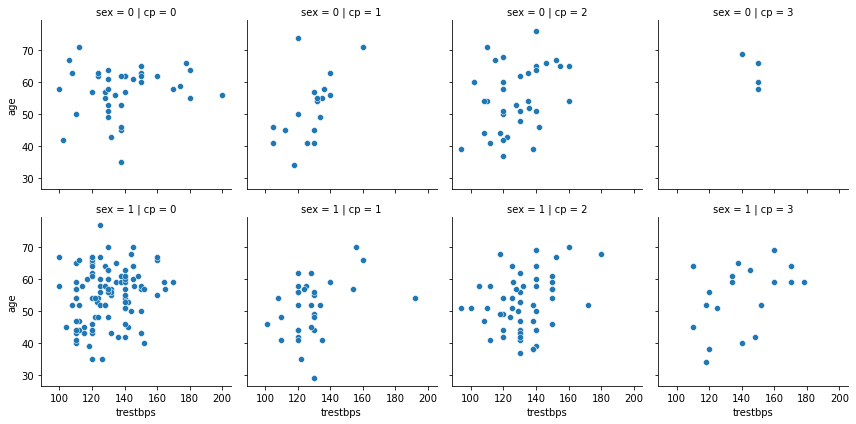

In [6]:
d = sns.FacetGrid(  ## levels 
    heart,
    col = 'cp',
    row = 'sex'
)

d.map(sns.scatterplot,
    'trestbps', # resting blood pressure (in mm Hg on admission to the hospital)
    'age')

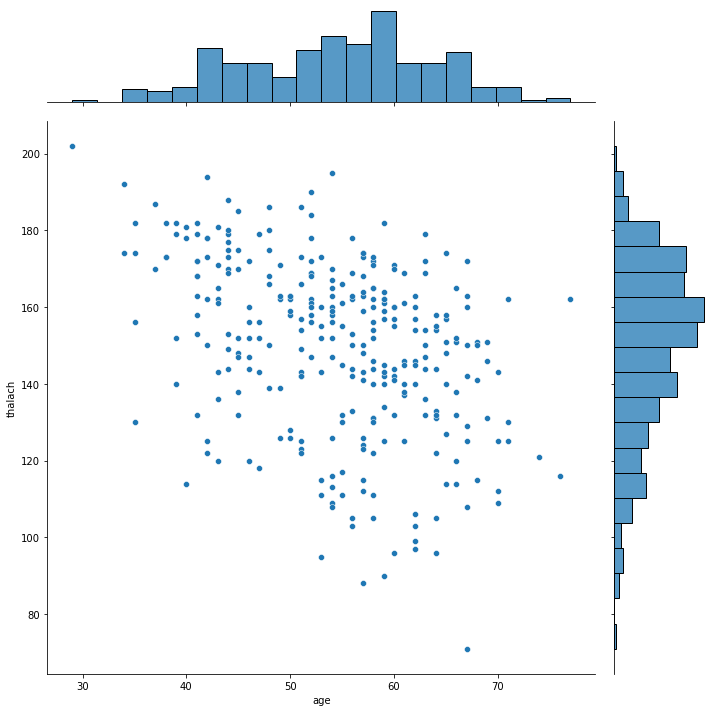

In [11]:
sns.jointplot(
    data=heart,
    x='age',
    y='thalach', # maximum heart rate achieved
    height=10,
    marginal_kws=dict(bins=20)
) # three plots

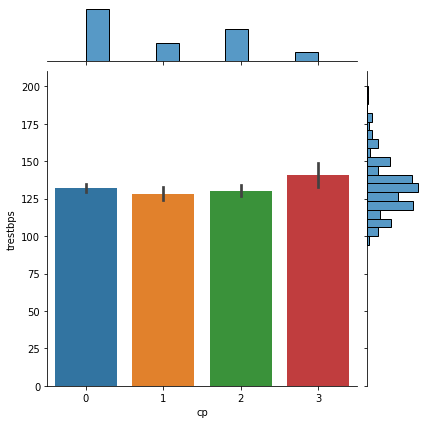

In [12]:
g = sns.JointGrid(data=heart,
x='cp',
y='trestbps')

g.plot(sns.barplot,
    sns.histplot
)

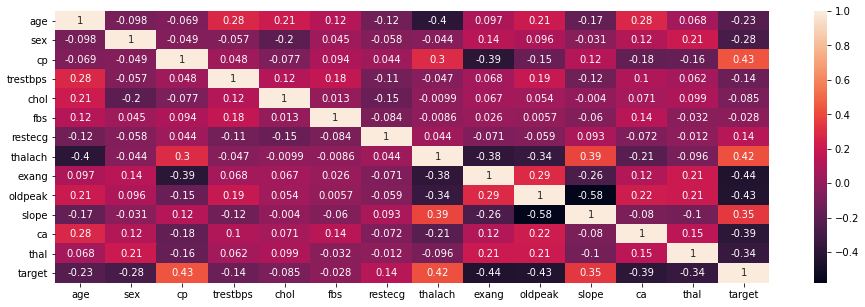

In [16]:
corr_m = heart.corr()
plt.figure(figsize = (16,5))
g=sns.heatmap(corr_m, annot=True)


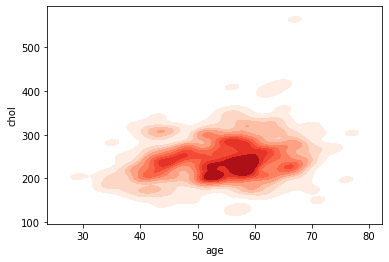

In [19]:
sns.kdeplot(x=heart.age, y=heart.chol, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

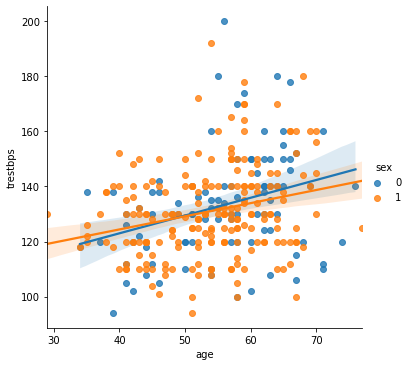

In [31]:
sns.lmplot(
    data=heart,
    x='age',
    y='trestbps',
    hue='sex'
) # sh

In [20]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Slope is a sort of test or way to measure the resistance of the heart during exercise (The ST segment/heart rate slope as a predictor of coronary ...).
The combination of the slope and the cp (chest pain) might give us a way to see if there is a relation between chest pain and the exercise with age and sex.
This is true because the `thalach` is the maximum heart rate achieved.

However, seen all plots, there is no relation between the resistance during exercise, the maximum heart rate and the chest pain and men and girls.

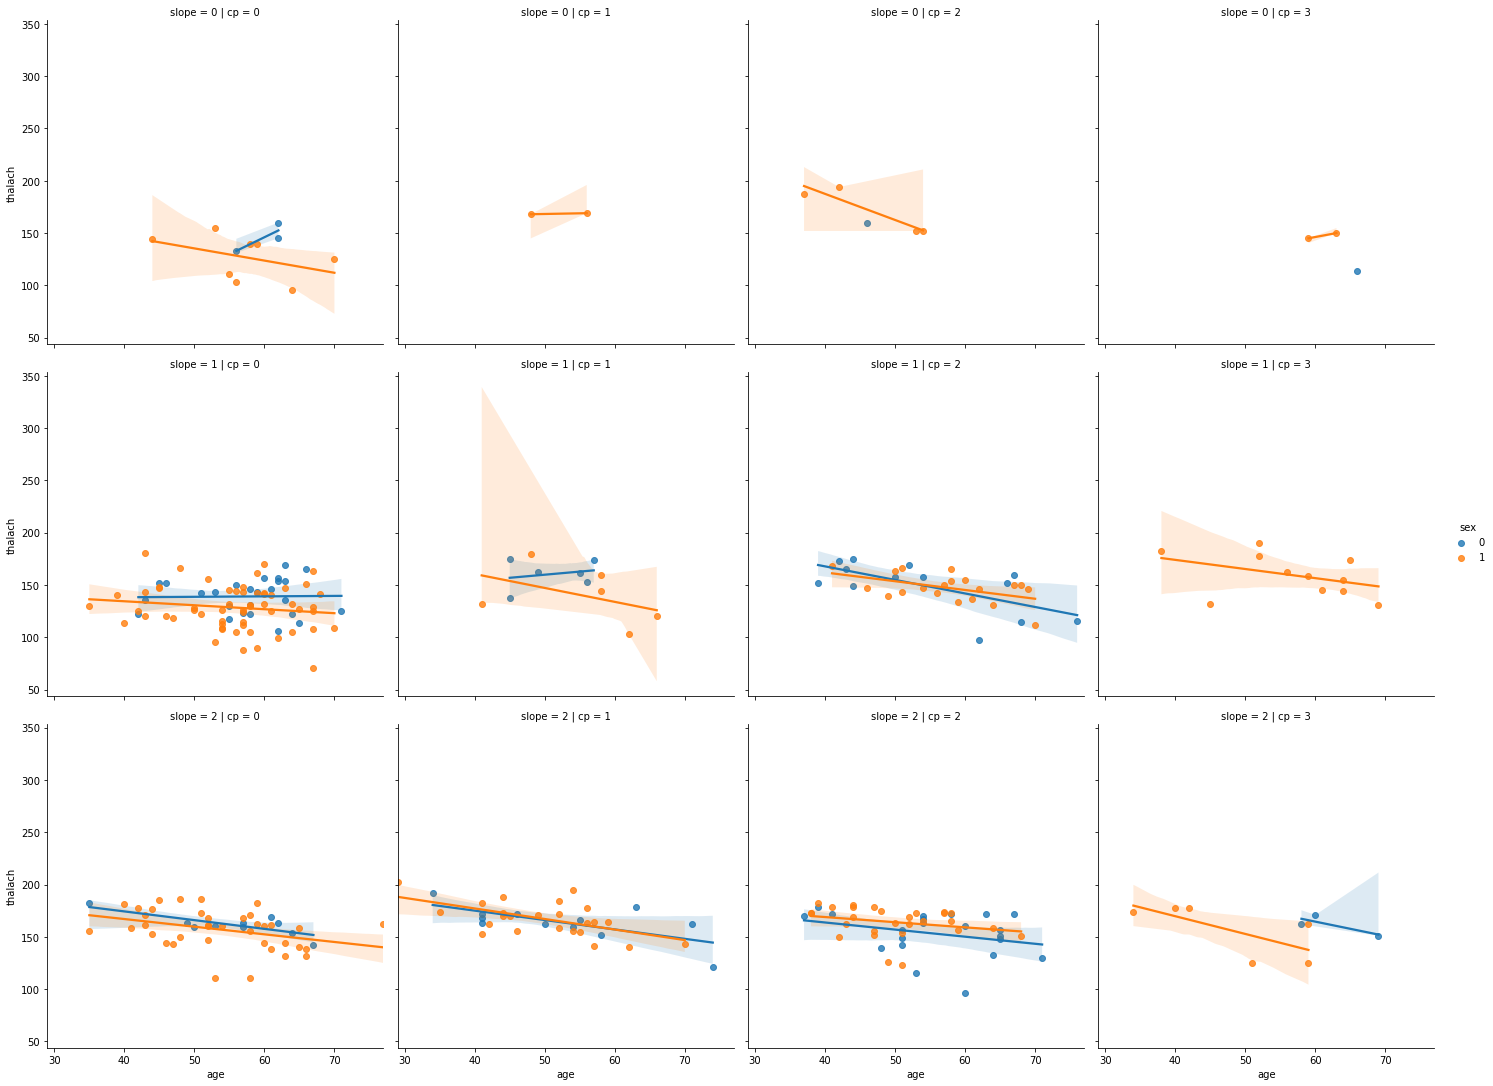

In [32]:
sns.lmplot(
    data=heart,
    x='age',
    y='thalach',
    hue='sex',
    col = 'cp',
    row = 'slope'
) # sh